In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 
sns.set(style="whitegrid")

In [3]:
folder_name = "MS2draft_graphs"
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [10]:
# Replace with your actual cleaned file paths
df_demo = pd.read_csv('merged_customer_data.csv')


# 1) View the first 5 rows
print("=== First 5 rows ===")
print(df_demo.head(), "\n")

# 2) Check the shape (rows x columns)
print("Shape of the dataset:", df_demo.shape, "\n")

# 3) View column names
print("Columns in the dataset:")
print(df_demo.columns.tolist(), "\n")

# 4) Quick info about data types and missing values
print("Dataset info:")
print(df_demo.info(), "\n")

# 5) Basic descriptive statistics for numerical columns
print("Descriptive statistics:")
print(df_demo.describe())

# Make sure TransactionDate is datetime in your merged dataset
df_demo['TransactionDate'] = pd.to_datetime(df_demo['TransactionDate'], errors='coerce')

# Check the first few rows
print(df_demo[['TransactionDate']].head())

# Optional: drop rows with missing TransactionDate if needed
df_demo = df_demo.dropna(subset=['TransactionDate'])


=== First 5 rows ===
                             CustomerID   Age  Gender         Location  \
0  0009fdd2-ae63-45ca-8d5b-d0ea98381f7b  21.0  Female      Lake George   
1  0009fdd2-ae63-45ca-8d5b-d0ea98381f7b  21.0  Female      Lake George   
2  000c6bbd-533a-432d-922c-ab64197e71c5  25.0    Male  North Oliviaton   
3  000c6bbd-533a-432d-922c-ab64197e71c5  25.0    Male  North Oliviaton   
4  000c6bbd-533a-432d-922c-ab64197e71c5  25.0    Male  North Oliviaton   

  IncomeLevel  SignupDate                         TransactionID  \
0         Low  2020-11-09  86cd577d-4ffd-498d-94ce-e68e6cca8865   
1         Low  2020-11-09  86cd577d-4ffd-498d-94ce-e68e6cca8865   
2        High  2019-11-06                                   NaN   
3        High  2019-11-06                                   NaN   
4        High  2019-11-06                                   NaN   

  TransactionDate  Amount ProductCategory  PaymentMethod  \
0      2023-10-26  389.69   Home & Garden  Bank Transfer   
1      2023

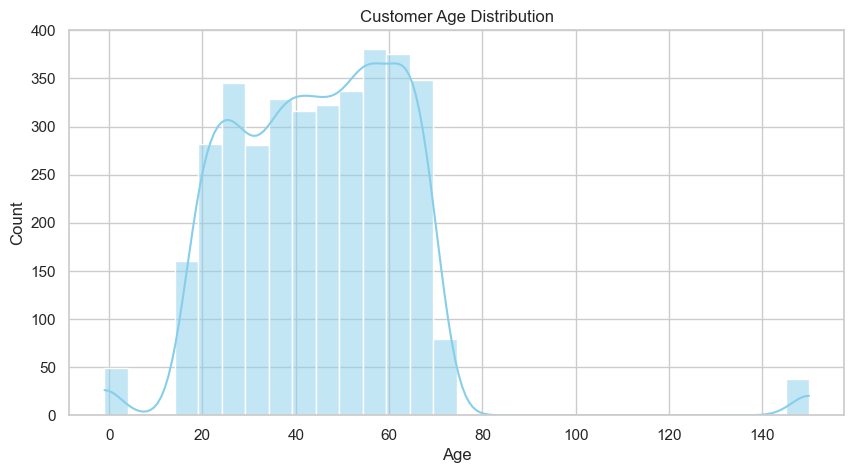

In [11]:
# 4.1 Age Distribution - Histogram + KDE
plt.figure(figsize=(10,5))
sns.histplot(df_demo['Age'], bins=30, kde=True, color='skyblue')
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig(f'{folder_name}/age_distribution.png')
plt.show()

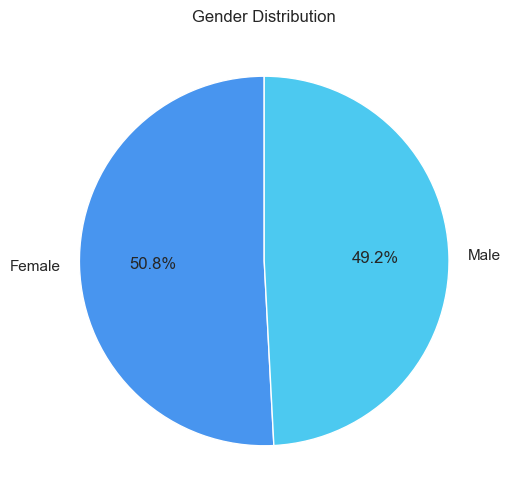

In [15]:

# Make sure Gender column exists
if 'Gender' in df_demo.columns:
    gender_counts = df_demo['Gender'].value_counts()
    
    plt.figure(figsize=(6,6))
    plt.pie(
        gender_counts,
        labels=gender_counts.index,
        autopct='%1.1f%%',
        colors=['#4895EF', '#4CC9F0'],  # blue tones
        startangle=90,  # rotate so first slice starts at top
        wedgeprops={'edgecolor': 'white'}  # add white borders
    )
    plt.title('Gender Distribution')
    
    # Save figure (ensure folder exists)
    plt.savefig(f'{folder_name}/gender_distribution_pie.png', bbox_inches='tight')
    plt.show()
else:
    print("Column 'Gender' not found in df_demo.")


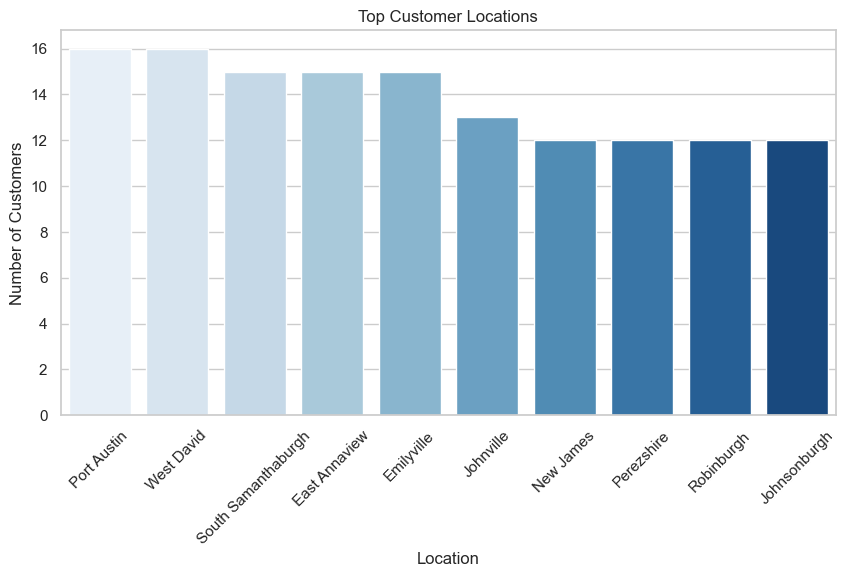

In [50]:
# 4.3 Top 10 Locations - Bar Chart
top_locations_df = top_locations.reset_index()
top_locations_df.columns = ['Location', 'Count']

plt.figure(figsize=(10,5))

sns.barplot(
    x='Location',
    y='Count',
    hue='Location',     # add hue to satisfy Seaborn 0.14+
    data=top_locations_df,
    dodge=False,        # combine bars
    palette='Blues',    # blue color palette
    legend=False        # remove redundant legend
)
plt.savefig(f'{folder_name}/top_10_location')
plt.title('Top Customer Locations')
plt.xlabel('Location')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

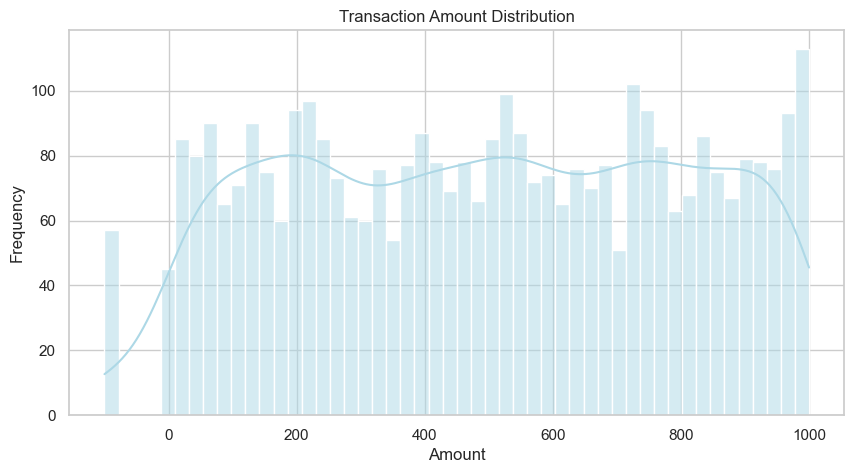

In [51]:
# 5.1 Transaction Amount - Histogram
df_transactions = df_demo.dropna(subset=['Amount'])

plt.figure(figsize=(10,5))
sns.histplot(
    df_transactions['Amount'],
    bins=50,
    kde=True,
    color='lightblue'  # change to blue
)
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.savefig(f'{folder_name}/transaction_amount_distribution')
plt.show()


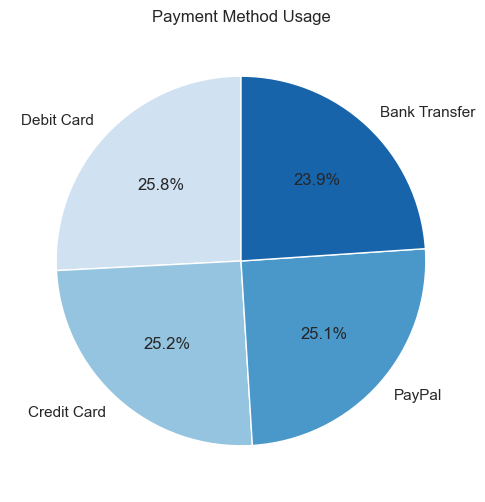

In [52]:
if 'PaymentMethod' in df_demo.columns:
    payment_counts = df_demo['PaymentMethod'].value_counts()
    
    plt.figure(figsize=(6,6))
    plt.pie(
        payment_counts,
        labels=payment_counts.index,
        autopct='%1.1f%%',
        colors=sns.color_palette("Blues", len(payment_counts)),  # blue tones
        startangle=90,
        wedgeprops={'edgecolor': 'white'}
    )
    plt.title('Payment Method Usage')
    plt.savefig(f'{folder_name}/payment_method')
    plt.show()
else:
    print("Column 'PaymentMethod' not found in df_demo.")

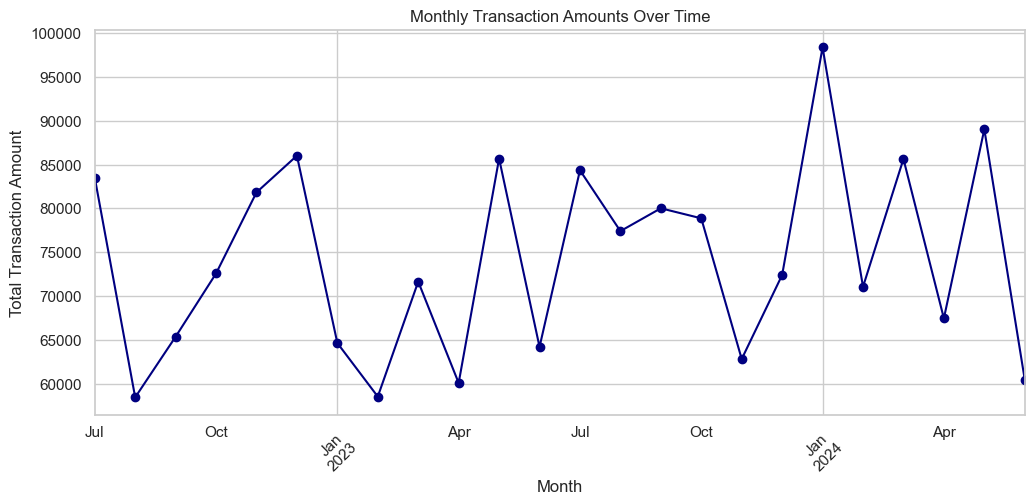

In [53]:
# Ensure TransactionDate is datetime
df_demo['TransactionDate'] = pd.to_datetime(df_demo['TransactionDate'], errors='coerce')

# Drop rows with missing TransactionDate or Amount
df_transactions = df_demo.dropna(subset=['TransactionDate', 'Amount'])

# Group by month and sum Amount
monthly_amount = df_transactions.groupby(df_transactions['TransactionDate'].dt.to_period('M'))['Amount'].sum()

# Plot
plt.figure(figsize=(12,5))
monthly_amount.plot(kind='line', marker='o', color='navy')  # blue color
plt.title('Monthly Transaction Amounts Over Time')
plt.xlabel('Month')
plt.ylabel('Total Transaction Amount')
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig(f'{folder_name}/monthly_transaction_amountsOT')
plt.show()

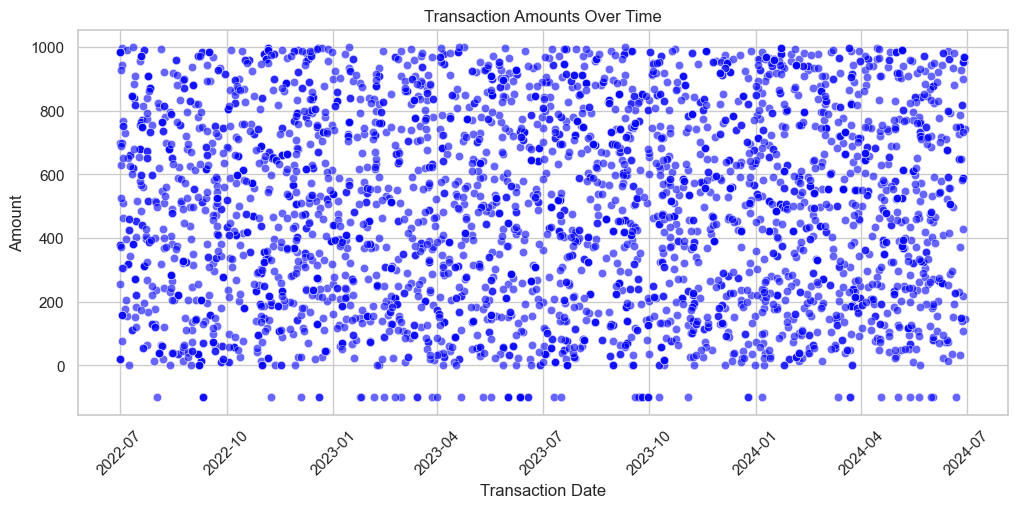

In [54]:
# Ensure TransactionDate is datetime
df_demo['TransactionDate'] = pd.to_datetime(df_demo['TransactionDate'], errors='coerce')

# Drop rows with missing TransactionDate or Amount
df_transactions = df_demo.dropna(subset=['TransactionDate', 'Amount'])

# Scatter plot
plt.figure(figsize=(12,5))
sns.scatterplot(
    x='TransactionDate',
    y='Amount',
    data=df_transactions,
    color='blue',   # blue color
    alpha=0.6
)
plt.title('Transaction Amounts Over Time')
plt.xlabel('Transaction Date')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig(f'{folder_name}/transaction_amountsOT')
plt.show()

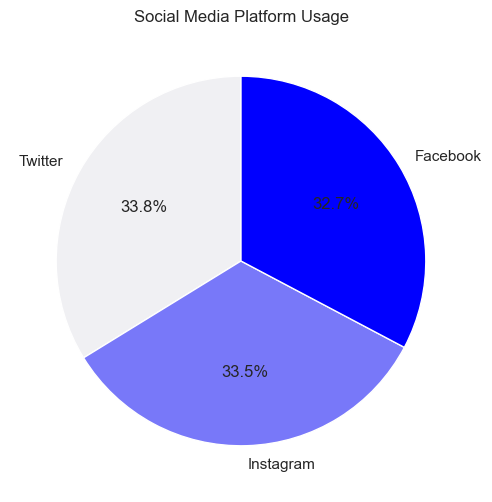

In [55]:
# -----------------------------
# Step 6: Social Media Interactions
# -----------------------------

# 6.1 Platform - Pie Chart

if 'Platform' in df_demo.columns:
    platform_counts = df_demo['Platform'].value_counts()
    
    plt.figure(figsize=(6,6))
    plt.pie(
        platform_counts,
        labels=platform_counts.index,
        autopct='%1.1f%%',
        colors=sns.light_palette("blue", n_colors=len(platform_counts)),  # lighter blue shades
        startangle=90,
        wedgeprops={'edgecolor': 'white'}
    )
    plt.title('Social Media Platform Usage')
    plt.savefig(f'{folder_name}/socmed_platform_usage')
    plt.show()
    
else:
    print("Column 'Platform' not found in df_demo.")


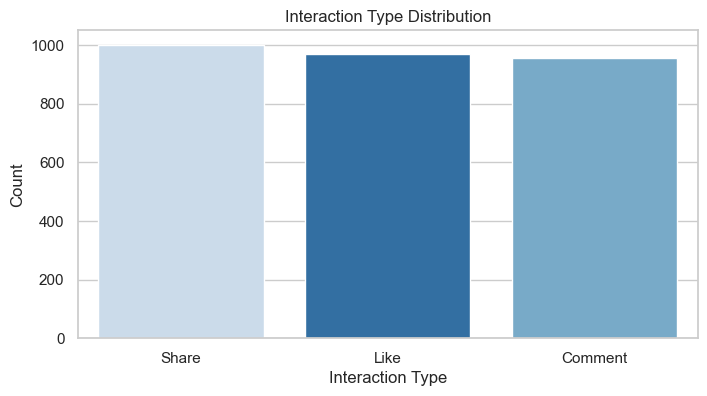

In [56]:
# 6.2 Interaction Type - Bar Chart
if 'InteractionType' in df_demo.columns:
    plt.figure(figsize=(8,4))
    
    sns.countplot(
        x='InteractionType',
        hue='InteractionType',  # use hue to avoid Seaborn 0.14+ warning
        data=df_demo,
        order=df_demo['InteractionType'].value_counts().index,
        dodge=False,
        palette='Blues',         # blue-themed palette
        legend=False             # remove redundant legend
    )
    
    plt.title('Interaction Type Distribution')
    plt.xlabel('Interaction Type')
    plt.ylabel('Count')
    plt.savefig(f'{folder_name}/interaction_type_distribution')
    plt.show()
else:
    print("Column 'InteractionType' not found in df_demo.")


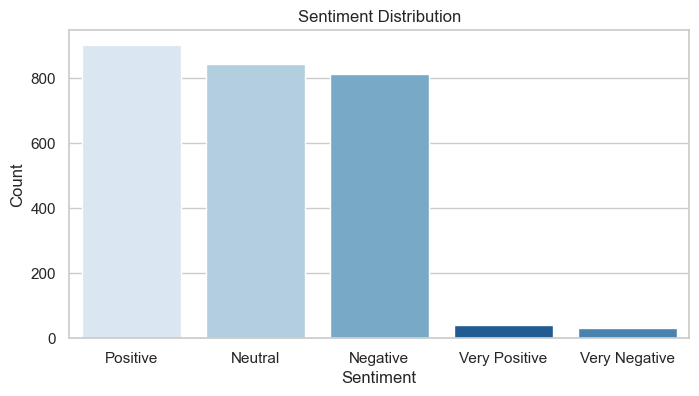

In [57]:

if 'Sentiment' in df_demo.columns:
    plt.figure(figsize=(8,4))
    
    sns.countplot(
        x='Sentiment',
        hue='Sentiment',               # hue avoids Seaborn 0.14+ warning
        data=df_demo,
        order=df_demo['Sentiment'].value_counts().index,
        dodge=False,                    # combine bars
        palette='Blues',                # blue-themed palette
        legend=False                    # remove redundant legend
    )
    
    plt.title('Sentiment Distribution')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.savefig(f'{folder_name}/sentiment_distribution')
    plt.show()
else:
    print("Column 'Sentiment' not found in df_demo.")


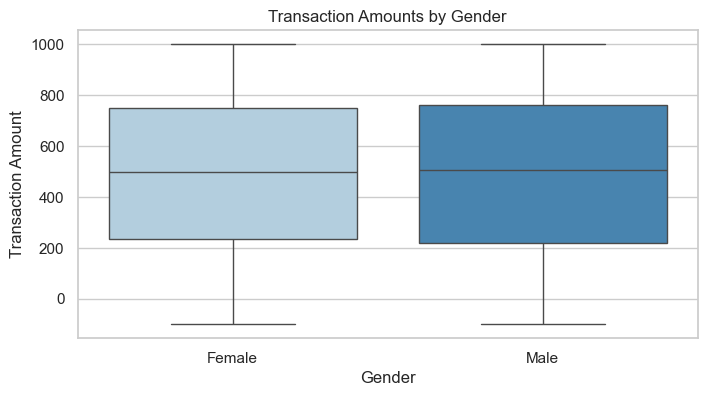

In [58]:
# -----------------------------
# Step 7: Cross-Dataset Analysis
# -----------------------------

df_analysis = df_demo.dropna(subset=['Amount', 'Gender'])

plt.figure(figsize=(8,4))
sns.boxplot(
    x='Gender',
    y='Amount',
    hue='Gender',           # add hue to satisfy Seaborn 0.14+
    data=df_analysis,
    dodge=False,            # combine boxes
    palette='Blues',
    legend=False            # remove redundant legend
)
plt.title('Transaction Amounts by Gender')
plt.xlabel('Gender')
plt.ylabel('Transaction Amount')
plt.savefig(f'{folder_name}/transaction_amount_Gender')
plt.show()

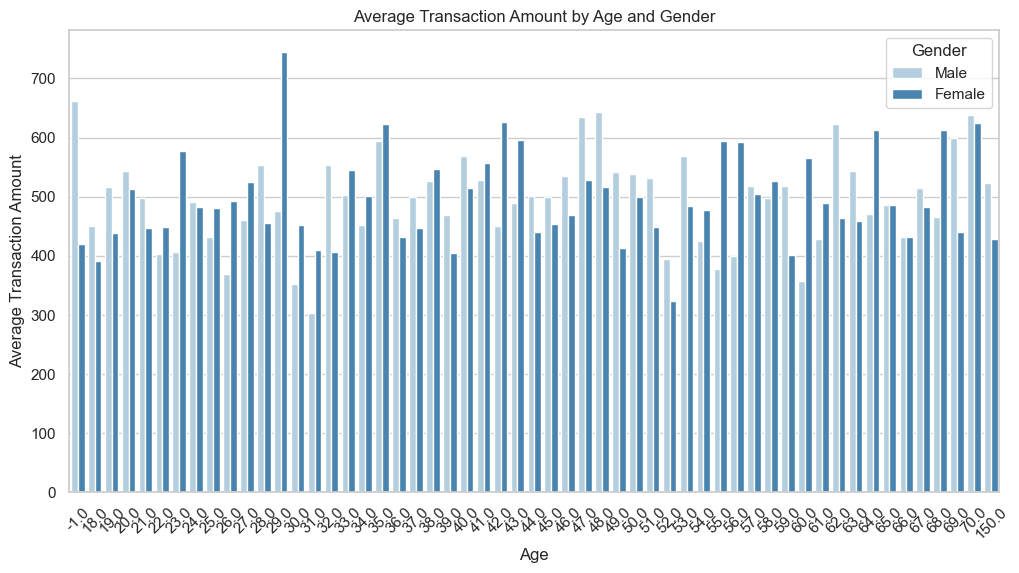

In [59]:
# Drop rows with missing Age, Amount, or Gender
df_analysis = df_demo.dropna(subset=['Age', 'Amount', 'Gender'])

plt.figure(figsize=(12,6))
sns.barplot(
    x='Age',
    y='Amount',
    hue='Gender',
    data=df_analysis,
    palette=sns.color_palette("Blues", n_colors=df_analysis['Gender'].nunique()),
    errorbar=None  # removes confidence intervals (Seaborn 0.14+)
)

plt.title('Average Transaction Amount by Age and Gender')
plt.xlabel('Age')
plt.ylabel('Average Transaction Amount')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.savefig(f'{folder_name}/avg_transaction_amount_age&gender')
plt.show()

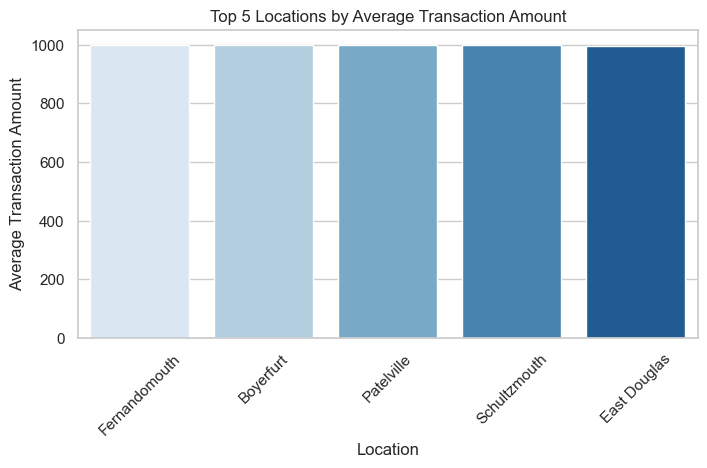

In [60]:
# 7.2 Top 5 Locations by Average Transaction Amount - Bar Chart
df_analysis = df_demo.dropna(subset=['Location', 'Amount'])

# Compute top 5 locations by average transaction amount
top_locations_avg = df_analysis.groupby('Location')['Amount'].mean().sort_values(ascending=False).head(5)
top_locations_df = top_locations_avg.reset_index()

plt.figure(figsize=(8,4))
sns.barplot(
    x='Location',
    y='Amount',
    data=top_locations_df,
    hue='Location',                    # satisfies Seaborn 0.14+
    dodge=False,                       # combine bars
    palette=sns.color_palette("Blues", n_colors=5),
    legend=False                       # remove redundant legend
)

plt.title('Top 5 Locations by Average Transaction Amount')
plt.xlabel('Location')
plt.ylabel('Average Transaction Amount')
plt.xticks(rotation=45)
plt.savefig(f'{folder_name}/top_5_location_avg_transaction_amount')
plt.show()